In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
d=pd.read_csv('/content/Customer-Churn.csv')
d

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# ***Undertanding the data***

In [3]:
d.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
d.shape

(7043, 21)

In [5]:
d.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
d.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
d.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
d.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


# ***Data Manipulation***

In [10]:
d=d.drop(['customerID'],axis=1)
d.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **pd.to_numeric(d.TotalCharges, errors='coerce'):**

* pd.to_numeric() is a Pandas function that converts a column or series to a numeric type.

* errors='coerce' means that if any value in TotalCharges cannot be converted to a number (e.g., empty strings or non-numeric text), it will be replaced with NaN (Not a Number) instead of raising an error.

In [11]:
d['TotalCharges'] = pd.to_numeric(d.TotalCharges, errors='coerce')
d.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Here we see that the TotalCharges has 11 missing values. Let's check this data.

**np.isnan(df['TotalCharges'])**

* np.isnan() is a NumPy function that checks whether each value in the column is NaN (Not a Number).
* It returns a Boolean Series (True for NaN, False otherwise).

In [12]:
d[np.isnan(d['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
d[d['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [14]:
d.drop(labels=d[d['tenure'] == 0].index, axis=0, inplace=True)
d[d['tenure'] == 0].index

Index([], dtype='int64')

In [15]:
d.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


**This code replaces the binary values in the SeniorCitizen column:**

* 0 → "No"
* 1 → "Yes"
It makes the data more readable. df.head() then displays the first five rows of the DataFrame.

In [16]:
d["SeniorCitizen"]= d["SeniorCitizen"].map({0: "No", 1: "Yes"})
d.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


describe the internetservice column


In [17]:
d["InternetService"].describe(include=['object', 'bool'])

,InternetService
count,7032
unique,3
top,Fiber optic
freq,3096


In [18]:
y= ['tenure', 'MonthlyCharges', 'TotalCharges']
d[y].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


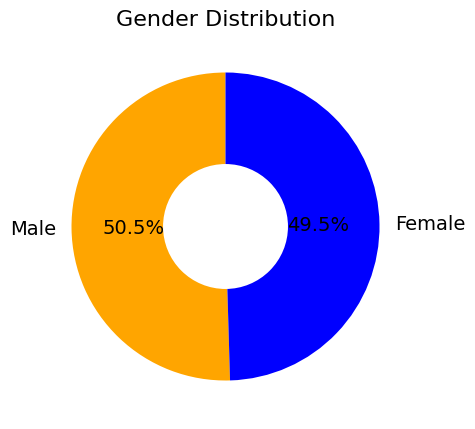

In [19]:
gender = d['gender'].value_counts()
plt.figure(figsize=(10, 5), dpi=100)

wedges, texts, autotexts = plt.pie(
    gender,
    labels=gender.index,
    colors=['orange', 'blue'],
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 14}
)


plt.gca().set_aspect('equal')
centre_circle = plt.Circle((0, 0), 0.4, color='white', fc='white', linewidth=1.25)
plt.gcf().gca().add_artist(centre_circle)

plt.title('Gender Distribution', fontsize=16)
plt.show()


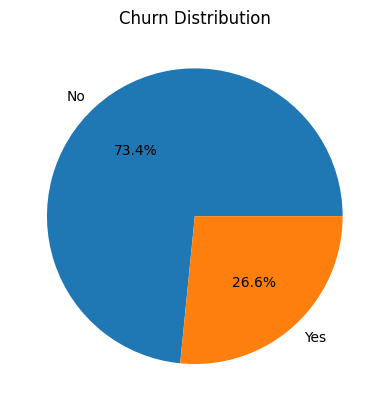

In [20]:
plt.pie(d['Churn'].value_counts(), labels=d['Churn'].value_counts().index, autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()

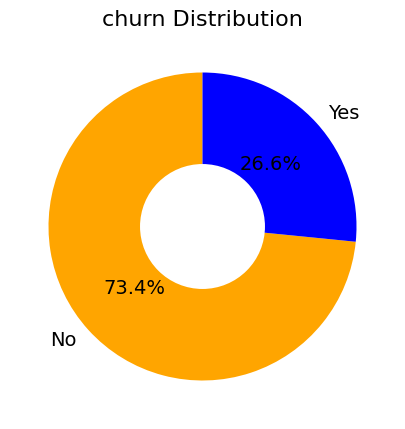

In [24]:
churn= d['Churn'].value_counts()
plt.figure(figsize=(10, 5), dpi=100)

wedges, texts, autotexts = plt.pie(
    churn,
    labels=churn.index,
    colors=['orange', 'blue'],
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 14}
)


plt.gca().set_aspect('equal')
centre_circle = plt.Circle((0, 0), 0.4, color='white', fc='white', linewidth=1.25)
plt.gcf().gca().add_artist(centre_circle)

plt.title('churn Distribution', fontsize=16)
plt.show()

In [25]:
d["Churn"][d["Churn"]=="No"].groupby(by=d["gender"]).count()


,Churn
gender,
Female,2544
Male,2619


In [27]:
d["Churn"][d["Churn"]=="Yes"].groupby(by=d["gender"]).count()


,Churn
gender,
Female,939
Male,930


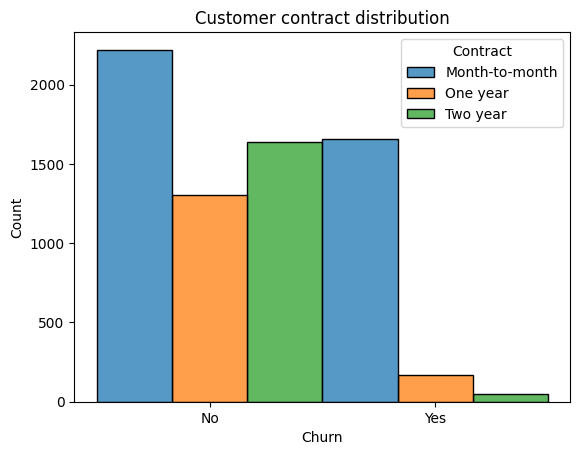

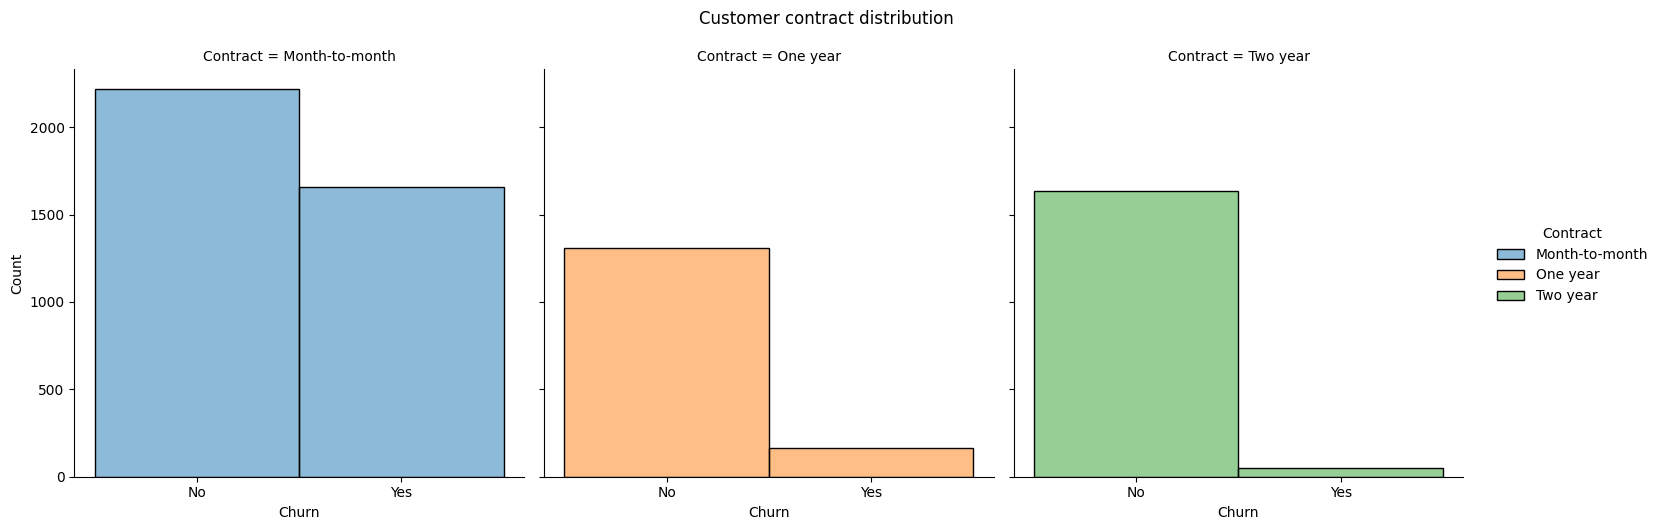

In [33]:
sns.histplot(data=d, x="Churn", hue="Contract", multiple="dodge")

plt.title("Customer contract distribution")
plt.show()


sns.displot(data=d, x="Churn", hue="Contract", col="Contract")
plt.suptitle("Customer contract distribution", y=1.05)
plt.show()

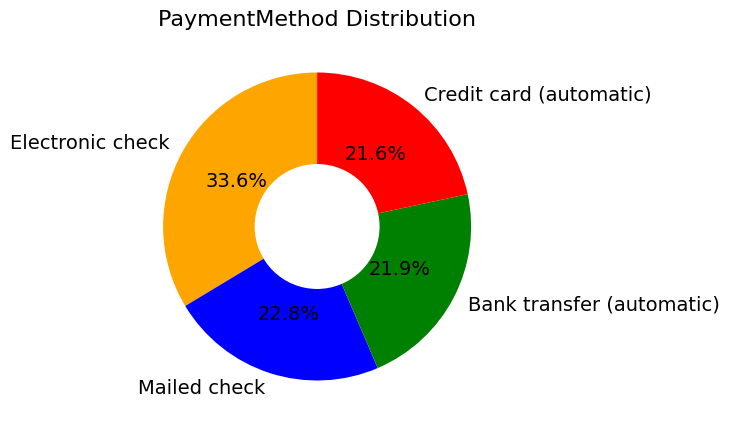

In [39]:
PaymentMethod= d['PaymentMethod'].value_counts()
plt.figure(figsize=(10, 5), dpi=100)

wedges, texts, autotexts = plt.pie(
    PaymentMethod,
    labels=PaymentMethod.index,
    colors=['orange', 'blue','green',],
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 14}
)


plt.gca().set_aspect('equal')
centre_circle = plt.Circle((0, 0), 0.4, color='white', fc='white', linewidth=1.25)
plt.gcf().gca().add_artist(centre_circle)

plt.title('PaymentMethod Distribution', fontsize=16)
plt.show()

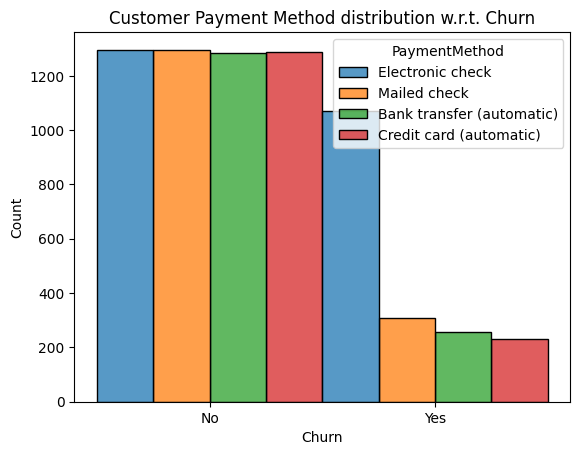

In [49]:
fig = sns.histplot(d, x="Churn", hue="PaymentMethod", multiple="dodge",color="greay")
plt.title("Customer Payment Method distribution w.r.t. Churn")
plt.show()

convert catogorical data into numerical


In [66]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                   'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV',
                   'StreamingMovies', 'Contract', 'PaperlessBilling',
                   'PaymentMethod', 'InternetService', 'SeniorCitizen']
for col in categorical_cols:
    d[col] = encoder.fit_transform(d[col])

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [68]:
x=d.drop(['Churn'],axis='columns')
y=d.Churn

In [69]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [70]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

# ***DATA PREDICTION***

# **Logistic regression**

In [65]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8033175355450237


In [99]:
from sklearn.metrics import classification_report, confusion_matrix
lr_pred= lr_model.predict(x_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

          No       0.85      0.88      0.87      1551
         Yes       0.64      0.58      0.61       559

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110



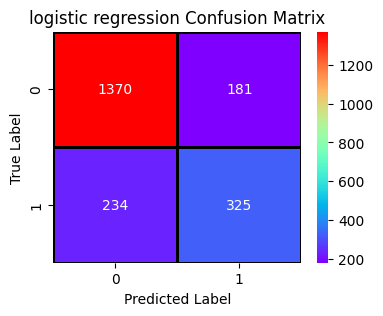

In [106]:
conf_matrix_result = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix_result, annot=True, fmt="d", cmap="rainbow", linewidths=2, linecolor="black")
plt.title("logistic regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Decision Tree Classifier**

In [112]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
pred_y = dt_model.predict(x_test)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7246445497630332


In [113]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

          No       0.82      0.80      0.81      1551
         Yes       0.48      0.52      0.50       559

    accuracy                           0.72      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.73      0.72      0.73      2110



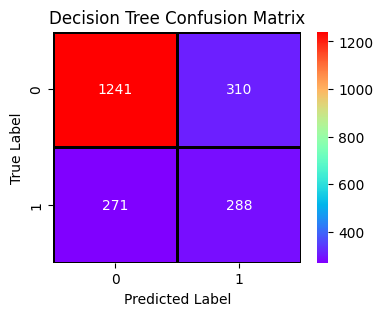

In [114]:
conf_matrix_result = confusion_matrix(y_test, pred_y)
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix_result, annot=True, fmt="d", cmap="rainbow", linewidths=2, linecolor="black")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **KNN**

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7767772511848341


In [84]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1551
         Yes       0.61      0.45      0.51       559

    accuracy                           0.78      2110
   macro avg       0.71      0.67      0.68      2110
weighted avg       0.76      0.78      0.76      2110



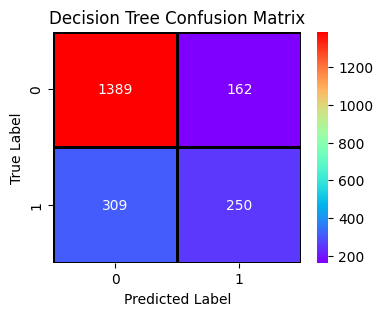

In [110]:
conf_matrix_result = confusion_matrix(y_test, predicted_y)
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix_result, annot=True, fmt="d", cmap="rainbow", linewidths=2, linecolor="black")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **SVM**

In [115]:
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(x_train,y_train)
predict_y = svc_model.predict(x_test)
accuracy_svc = svc_model.score(x_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7350710900473933


In [116]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

          No       0.74      1.00      0.85      1551
         Yes       0.00      0.00      0.00       559

    accuracy                           0.74      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.74      0.62      2110



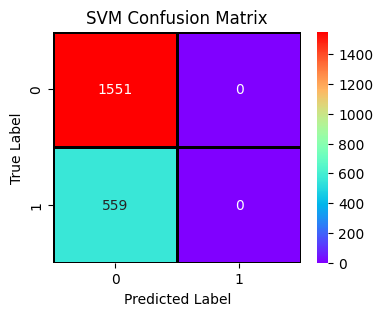

In [118]:
conf_matrix_result = confusion_matrix(y_test, predict_y)
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix_result, annot=True, fmt="d", cmap="rainbow", linewidths=2, linecolor="black")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Random Forest classification**

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
accuracy_rf = rf_model.score(x_test,y_test)
print("Random Forest accuracy is :",accuracy_rf)

Random Forest accuracy is : 0.7890995260663507


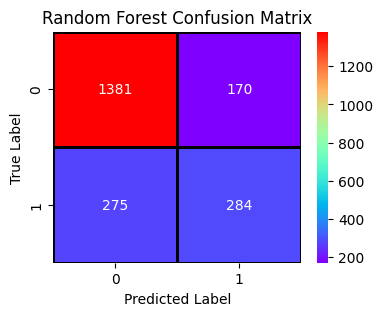

In [96]:
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="rainbow", linewidths=2, linecolor="black")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **PREDICTED SCORE**

* Logistic Regression accuracy is : 0.8033175355450237
* Decision Tree accuracy is : 0.7246445497630332
* KNN accuracy: 0.7767772511848341
* SVM accuracy is : 0.7350710900473933
* Random Forest accuracy is : 0.7890995260663507